In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_excel('/content/drive/MyDrive/Copy of airbnb data.xlsx')
data

,,City,Type of Day,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0.0,amsterdam,weekdays,194.03,Private room,FALSE,TRUE,2.0,FALSE,1.0,...,93.0,1.0,5.023,2.539,78.690,4.167,98.254,6.846,4.90569,52.41772
1,1.0,amsterdam,weekdays,344.25,Private room,FALSE,TRUE,4.0,FALSE,0.0,...,85.0,1.0,0.488,0.239,631.176,33.421,837.281,58.343,4.90005,52.37432
2,2.0,amsterdam,weekdays,264.10,Private room,FALSE,TRUE,2.0,FALSE,0.0,...,87.0,1.0,5.748,3.652,75.276,3.986,95.387,6.647,4.97512,52.36103
3,3.0,amsterdam,weekdays,433.53,Private room,FALSE,TRUE,4.0,FALSE,0.0,...,90.0,2.0,0.385,0.440,493.273,26.119,875.033,60.974,4.89417,52.37663
4,4.0,amsterdam,weekdays,485.55,Private room,FALSE,TRUE,2.0,TRUE,0.0,...,98.0,1.0,0.545,0.319,552.830,29.273,815.306,56.812,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51719,1794.0,vienna,weekends,715.94,Entire home/apt,FALSE,FALSE,6.0,FALSE,0.0,...,100.0,3.0,0.530,0.135,219.402,15.712,438.757,10.605,16.37940,48.21136
51720,1795.0,vienna,weekends,304.79,Entire home/apt,FALSE,FALSE,2.0,FALSE,0.0,...,86.0,1.0,0.810,0.101,204.970,14.679,342.183,8.270,16.38070,48.20296
51721,1796.0,vienna,weekends,637.17,Entire home/apt,FALSE,FALSE,2.0,FALSE,0.0,...,93.0,1.0,0.994,0.203,169.073,12.108,282.296,6.823,16.38568,48.20460
51722,1797.0,vienna,weekends,301.05,Private room,FALSE,TRUE,2.0,FALSE,0.0,...,87.0,1.0,3.044,0.287,109.237,7.823,158.563,3.832,16.34100,48.19200


## Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51724 entries, 0 to 51723
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0                               51707 non-null  float64
 1   City                        51707 non-null  object 
 2   Type of Day                 51707 non-null  object 
 3   Price                       51707 non-null  float64
 4   room_type                   51724 non-null  object 
 5   room_shared                 51724 non-null  object 
 6   room_private                51724 non-null  object 
 7   person_capacity             51707 non-null  float64
 8   host_is_superhost           51724 non-null  object 
 9   multi                       51707 non-null  float64
 10  biz                         51707 non-null  float64
 11  cleanliness_rating          51707 non-null  float64
 12  guest_satisfaction_overall  51707 non-null  float64
 13  bedrooms                    517

In [5]:
data.isnull().sum()

                              17
City                          17
Type of Day                   17
Price                         17
room_type                      0
room_shared                    0
room_private                   0
person_capacity               17
host_is_superhost              0
multi                         17
biz                           17
cleanliness_rating            17
guest_satisfaction_overall    17
bedrooms                      17
dist                          17
metro_dist                    17
attr_index                    17
attr_index_norm               17
rest_index                    17
rest_index_norm               17
lng                           17
lat                           17
dtype: int64

In [6]:
data[data.isnull().any(axis=1)]

,,City,Type of Day,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1103,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7361,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8917,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10196,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11481,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12682,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14757,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16706,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19564,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22471,NaN,NaN,NaN,NaN,room_type,room_shared,room_private,NaN,host_is_superhost,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.dropna(inplace=True)

# Data Analysis and Removing Outliers

In [8]:
data.head()

,,City,Type of Day,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0.0,amsterdam,weekdays,194.03,Private room,FALSE,TRUE,2.0,FALSE,1.0,...,93.0,1.0,5.023,2.539,78.690,4.167,98.254,6.846,4.90569,52.41772
1,1.0,amsterdam,weekdays,344.25,Private room,FALSE,TRUE,4.0,FALSE,0.0,...,85.0,1.0,0.488,0.239,631.176,33.421,837.281,58.343,4.90005,52.37432
2,2.0,amsterdam,weekdays,264.10,Private room,FALSE,TRUE,2.0,FALSE,0.0,...,87.0,1.0,5.748,3.652,75.276,3.986,95.387,6.647,4.97512,52.36103
3,3.0,amsterdam,weekdays,433.53,Private room,FALSE,TRUE,4.0,FALSE,0.0,...,90.0,2.0,0.385,0.440,493.273,26.119,875.033,60.974,4.89417,52.37663
4,4.0,amsterdam,weekdays,485.55,Private room,FALSE,TRUE,2.0,TRUE,0.0,...,98.0,1.0,0.545,0.319,552.830,29.273,815.306,56.812,4.90051,52.37508


In [10]:
data.describe()

,,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,1620.502388,279.879630,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191286,0.681539,294.204105,13.423791,626.856696,22.786176,7.426068,45.671128
std,1217.380366,327.948372,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393804,0.858025,224.754124,9.807983,497.920226,17.804097,9.799725,5.249263
min,0.000000,34.780000,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015000,0.002000,15.152000,0.926000,19.577000,0.593000,-9.226340,37.953000
25%,646.000000,148.750000,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453000,0.248000,136.797500,6.381000,250.854000,8.751500,-0.072500,41.399510
50%,1334.000000,211.340000,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.614000,0.413000,234.332000,11.468000,522.053000,17.542000,4.873000,47.506690
75%,2382.000000,319.690000,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263000,0.738000,385.756500,17.415000,832.629000,32.964500,13.518825,51.471885
max,5378.000000,18545.450000,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.285000,14.274000,4513.563000,100.000000,6696.157000,100.000000,23.786020,52.641410


<ipython-input-11-95b898a9b715>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()[['Price','guest_satisfaction_overall']], annot=True, cmap='Reds')


<Axes: >

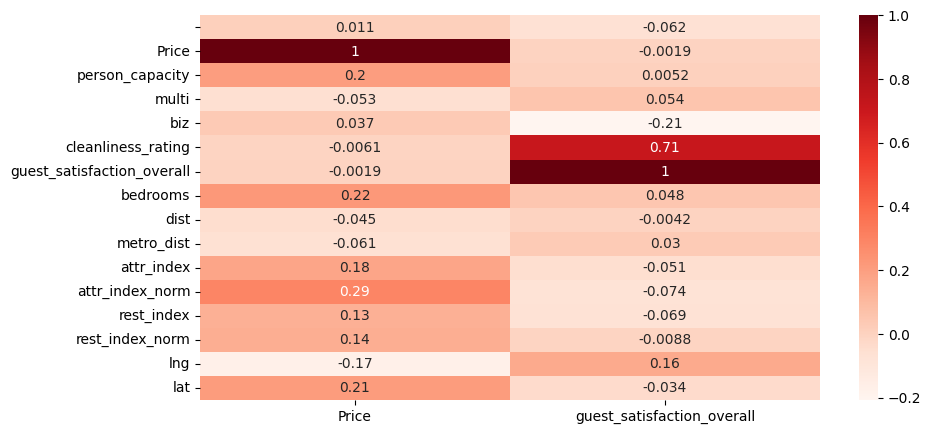

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(data.corr()[['Price','guest_satisfaction_overall']], annot=True, cmap='Reds')

<Axes: xlabel='cleanliness_rating', ylabel='guest_satisfaction_overall'>

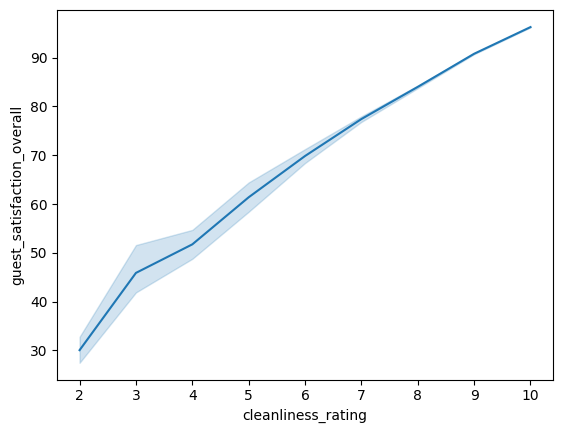

In [12]:
sns.lineplot(x='cleanliness_rating',y='guest_satisfaction_overall',data=data)

In [13]:
data['metro_dist'].corr(data['guest_satisfaction_overall'])

0.029787656166331347

In [14]:
data['metro_dist'].corr(data['Price'])

-0.06102391406673365

In [16]:
data.shape

(51707, 22)

In [17]:
data.groupby('City').agg( {'Price' : ['min','median','max']} )

Price                   
              min   median       max
City                                
amsterdam  128.89  460.245   8130.67
athens      42.88  127.720  18545.45
barcelona   69.59  208.300   6943.70
berlin      64.97  191.180   5857.48
budapest    34.78  152.980   3751.23
lisbon      70.59  225.380   1681.05
london      54.33  261.290  15499.89
paris       92.74  317.600  16445.61
rome        46.06  182.590   2418.35
vienna      63.58  208.490  13664.31

In [18]:
data.groupby(['City'])['guest_satisfaction_overall'].mean()

City
amsterdam    94.514423
athens       95.003598
barcelona    91.109072
berlin       94.323671
budapest     94.585281
lisbon       91.093875
london       90.645652
paris        92.037530
rome         93.122300
vienna       93.731128
Name: guest_satisfaction_overall, dtype: float64

In [19]:
data.groupby('City').agg({'guest_satisfaction_overall': ['mean']})

,guest_satisfaction_overall
,mean
City,
amsterdam,94.514423
athens,95.003598
barcelona,91.109072
berlin,94.323671
budapest,94.585281
lisbon,91.093875
london,90.645652
paris,92.037530


<Axes: >

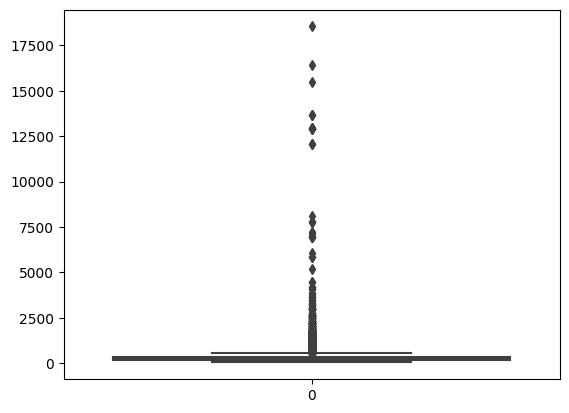

In [20]:
sns.boxplot(data['Price'])

<Axes: xlabel='Price', ylabel='Count'>

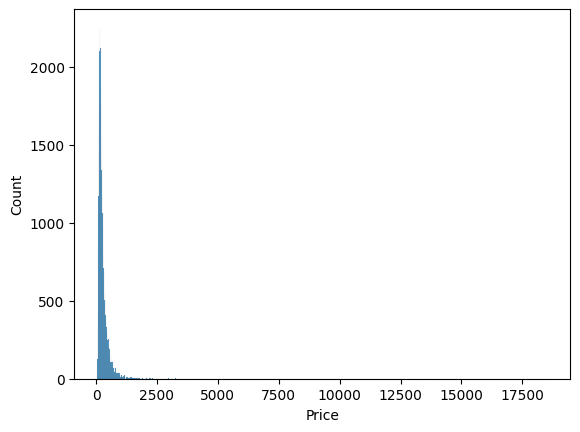

In [23]:
sns.histplot(data['Price'])

In [21]:
data['City']<data['City'].mode()[0]

0         True
1         True
2         True
3         True
4         True
         ...  
51719    False
51720    False
51721    False
51722    False
51723    False
Name: City, Length: 51707, dtype: bool

In [22]:
data['City'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: City, dtype: int64

In [24]:
check=data[data['City']==data['City'].mode()[0]]
check.shape

(9993, 22)

<ipython-input-25-932302eb71bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)


<Axes: >

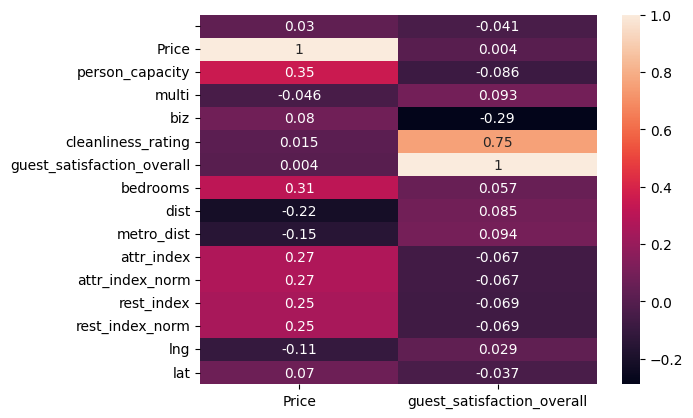

In [25]:
sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)

(0.0, 2000.0)

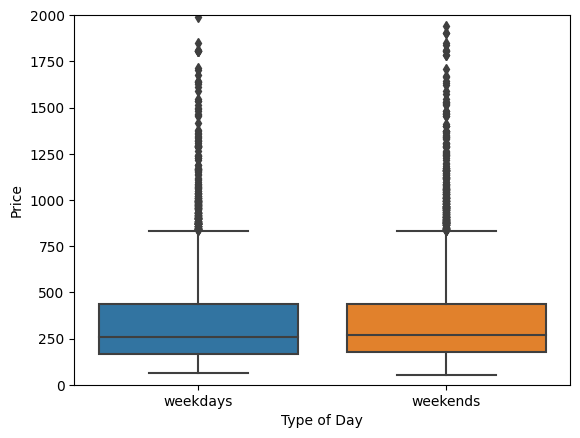

In [26]:
sns.boxplot(y='Price',x='Type of Day',data=check)
plt.ylim(0,2000)

In [27]:
check[check['Price']>1500].shape

(112, 22)

In [28]:
city=list(data['City'].unique())
city

['amsterdam',
 'athens',
 'barcelona',
 'berlin',
 'budapest',
 'lisbon',
 'london',
 'paris',
 'rome',
 'vienna']

amsterdam : (2080, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(22, 22)


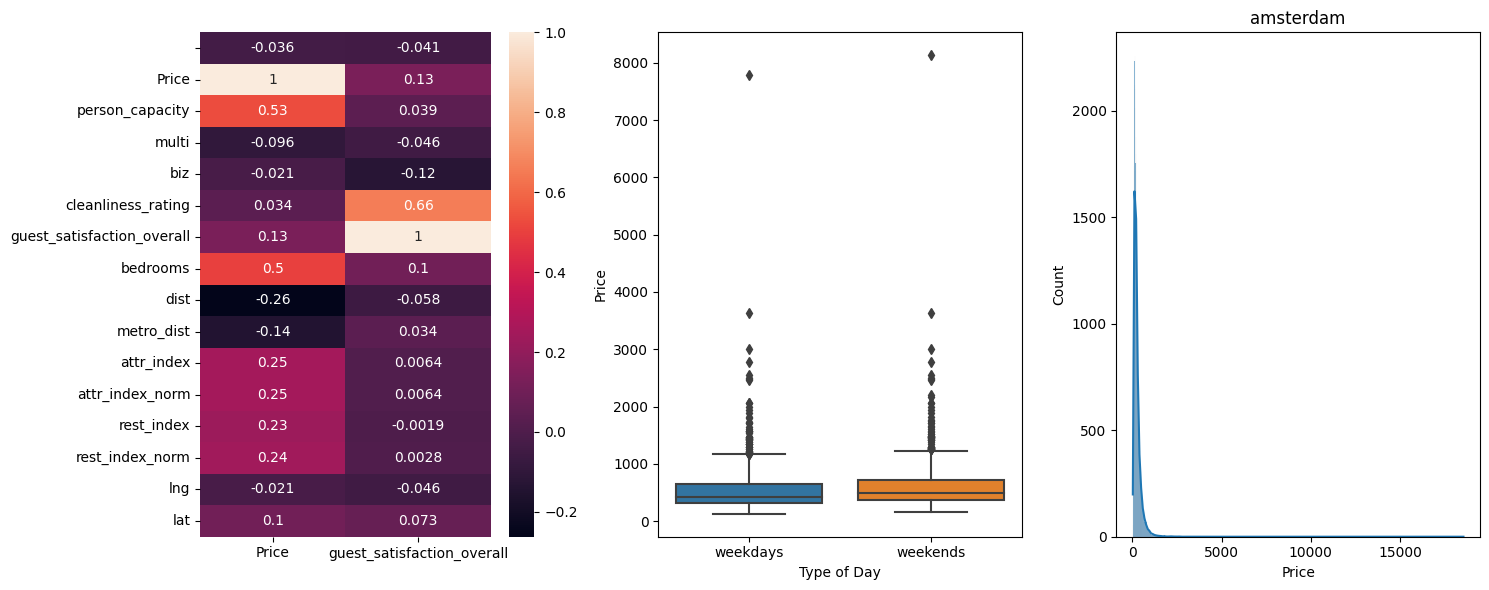

athens : (5280, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(1, 22)


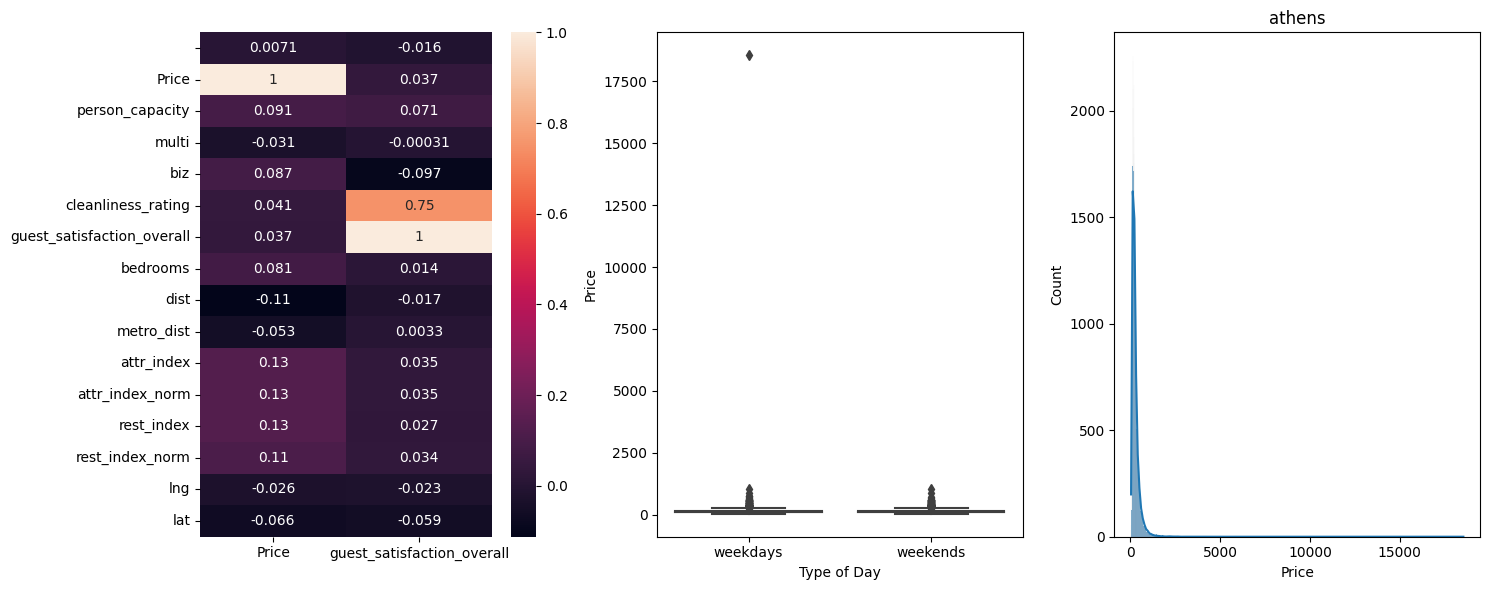

barcelona : (2833, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(8, 22)


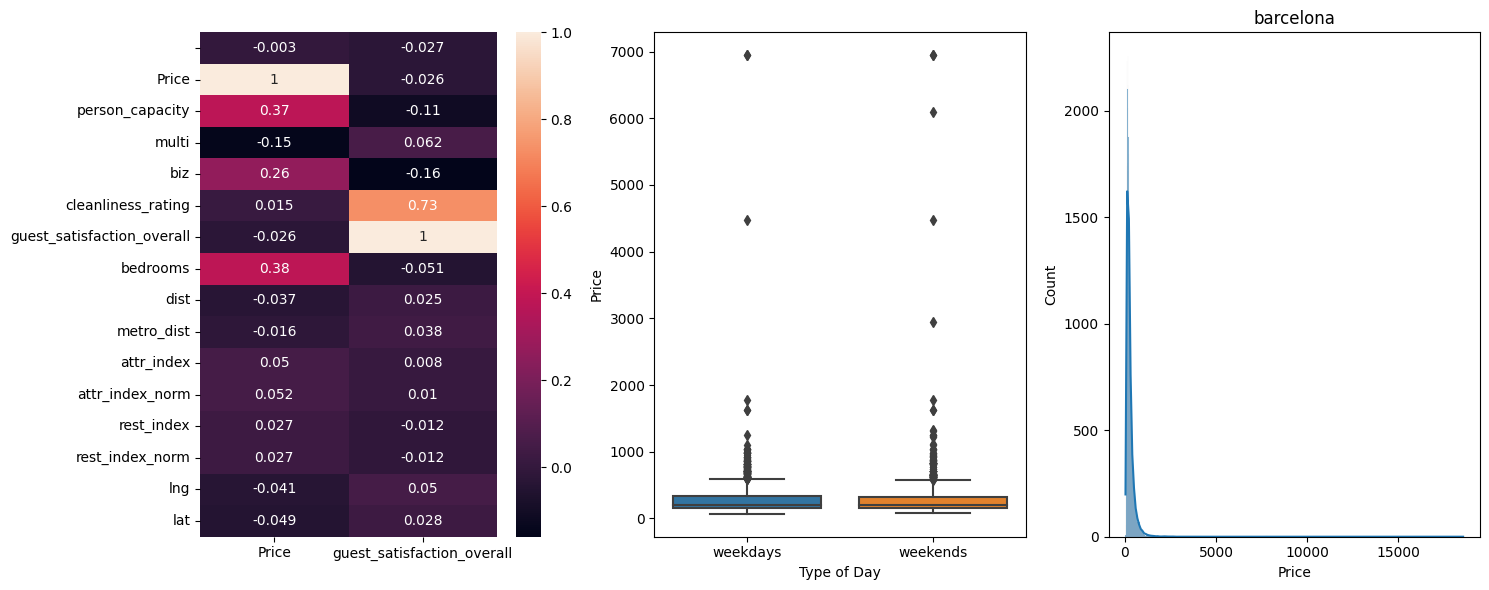

berlin : (2484, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(6, 22)


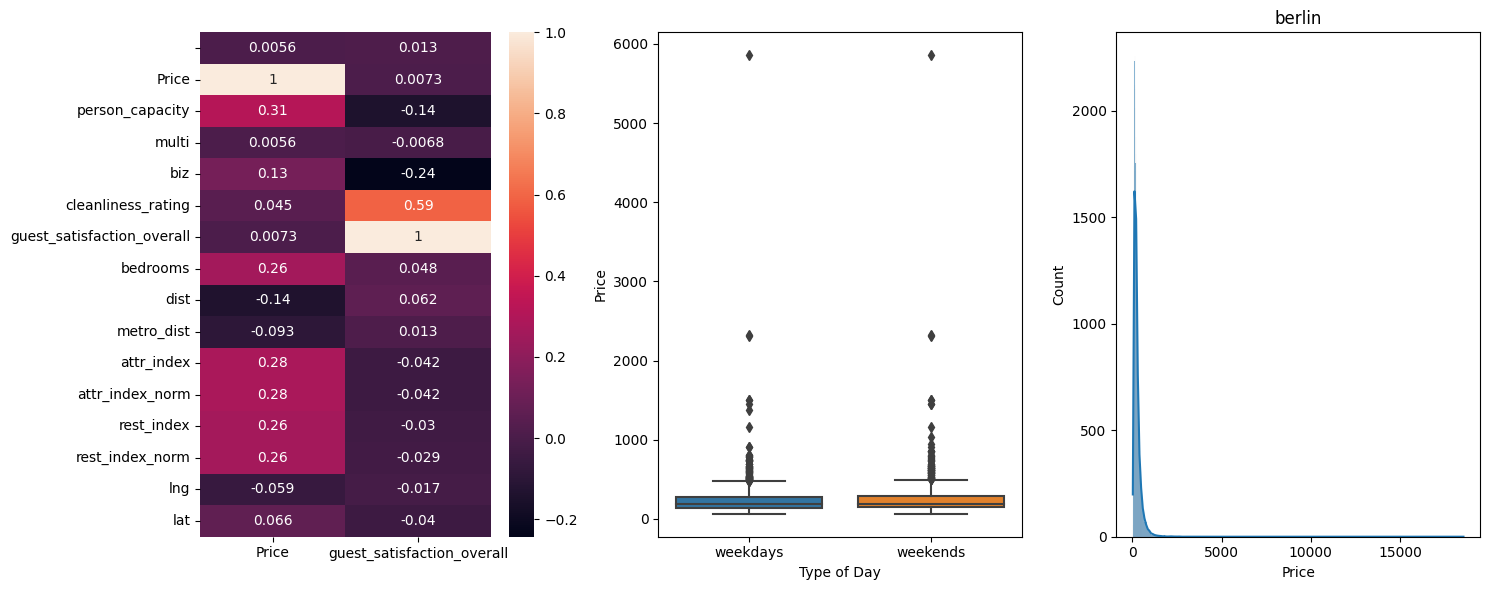

budapest : (4022, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(4, 22)


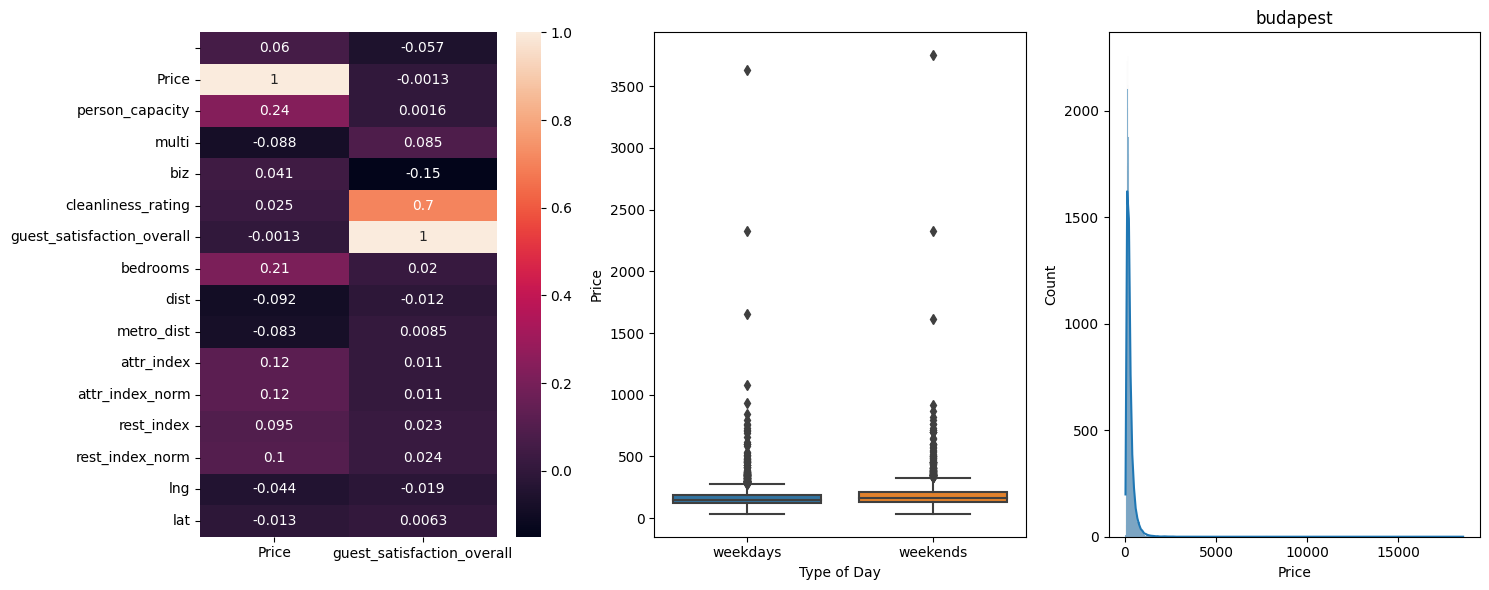

lisbon : (5763, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(0, 22)


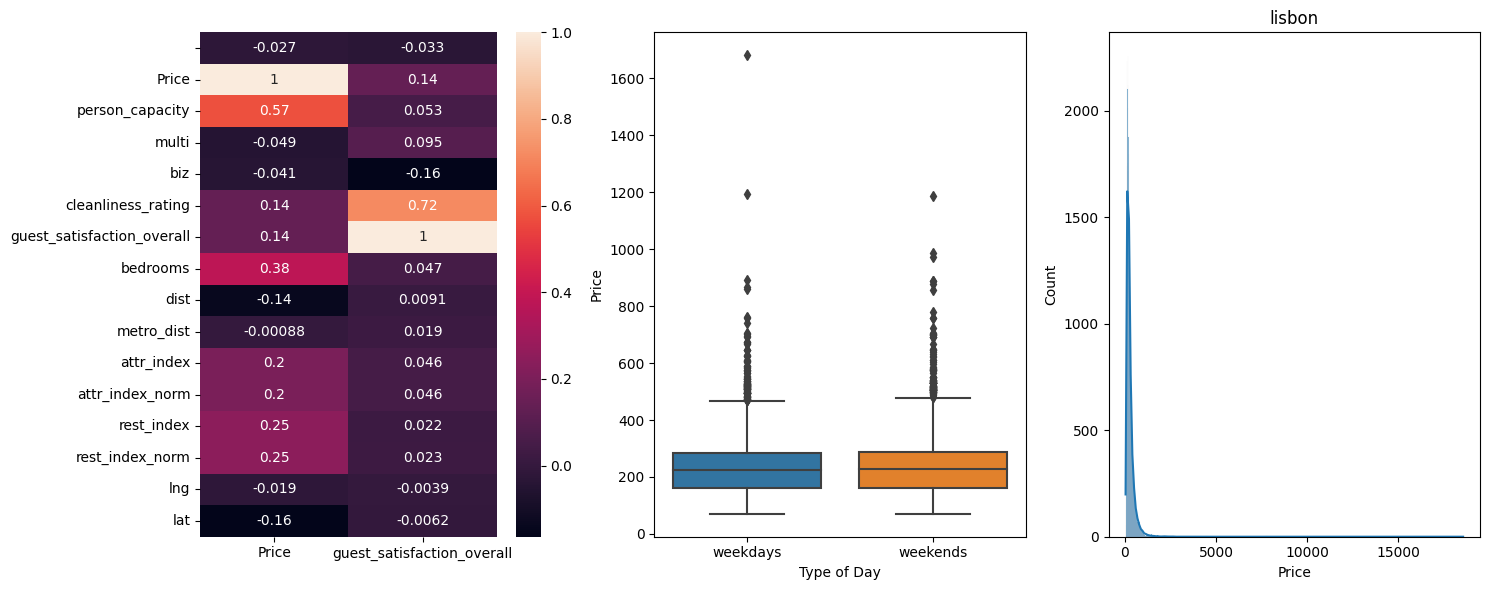

london : (9993, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(68, 22)


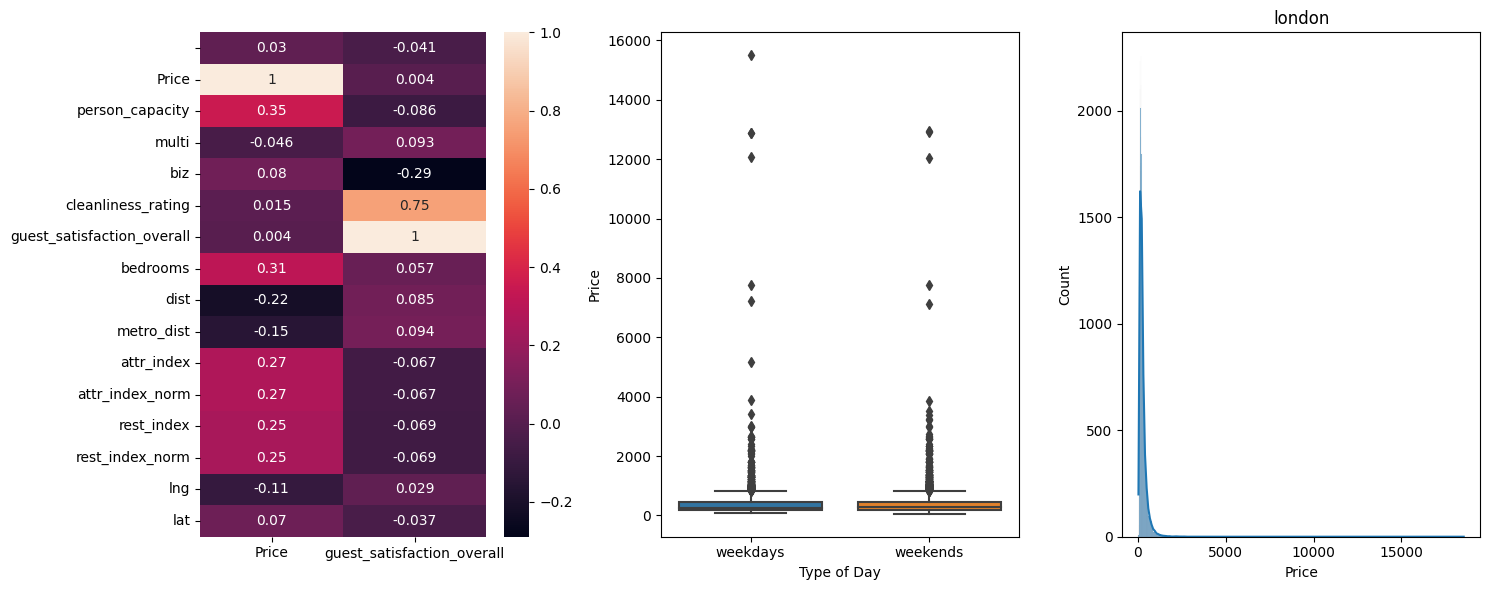

paris : (6688, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(19, 22)


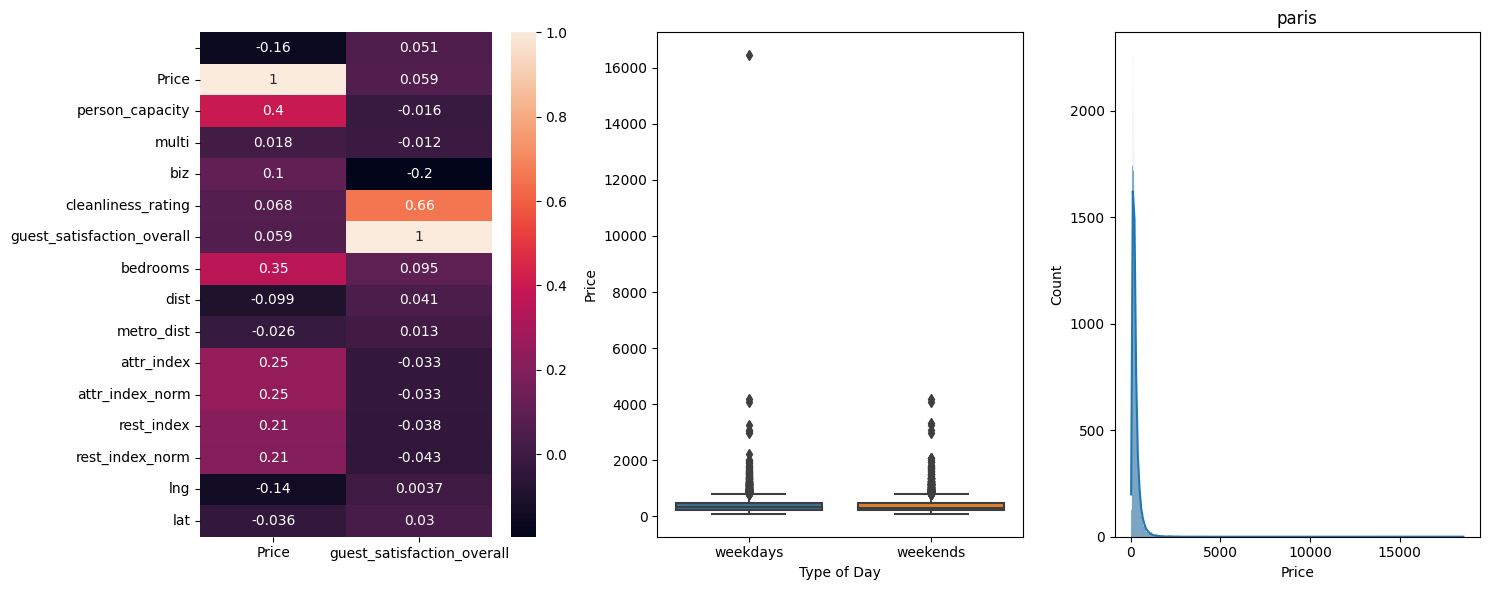

rome : (9027, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(5, 22)


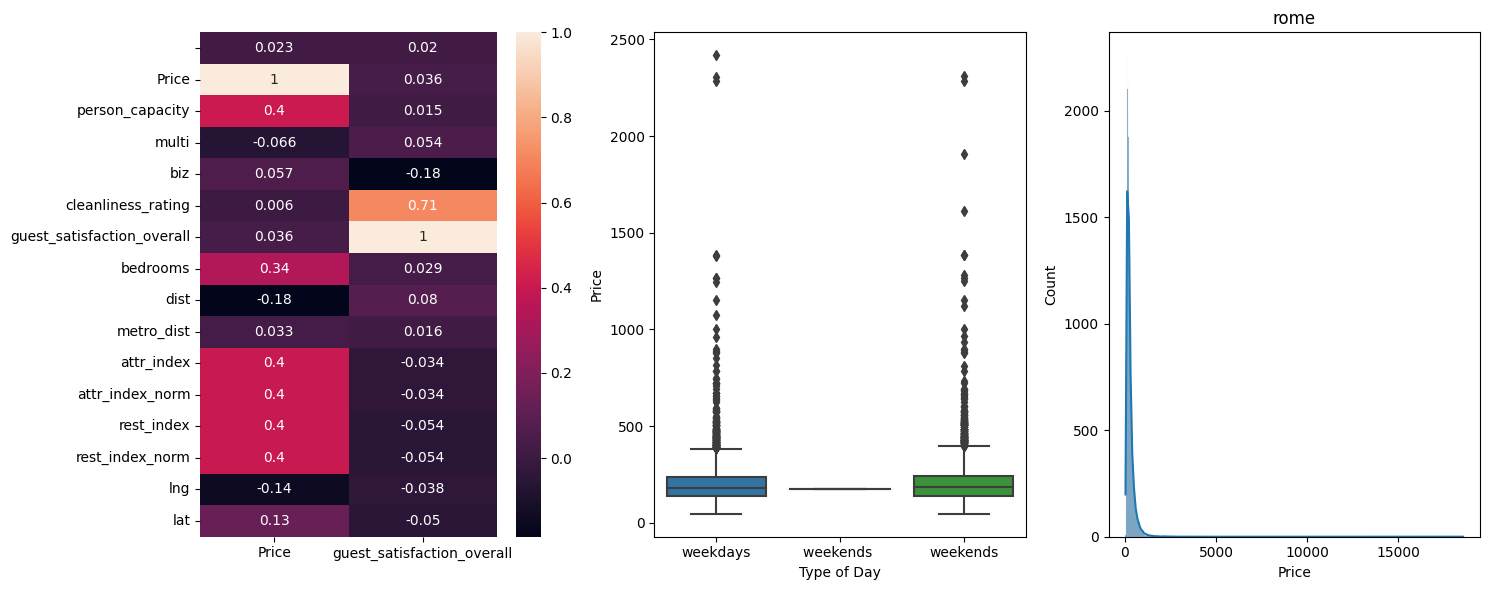

vienna : (3537, 22)


<ipython-input-29-326753aa82b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(3, 22)


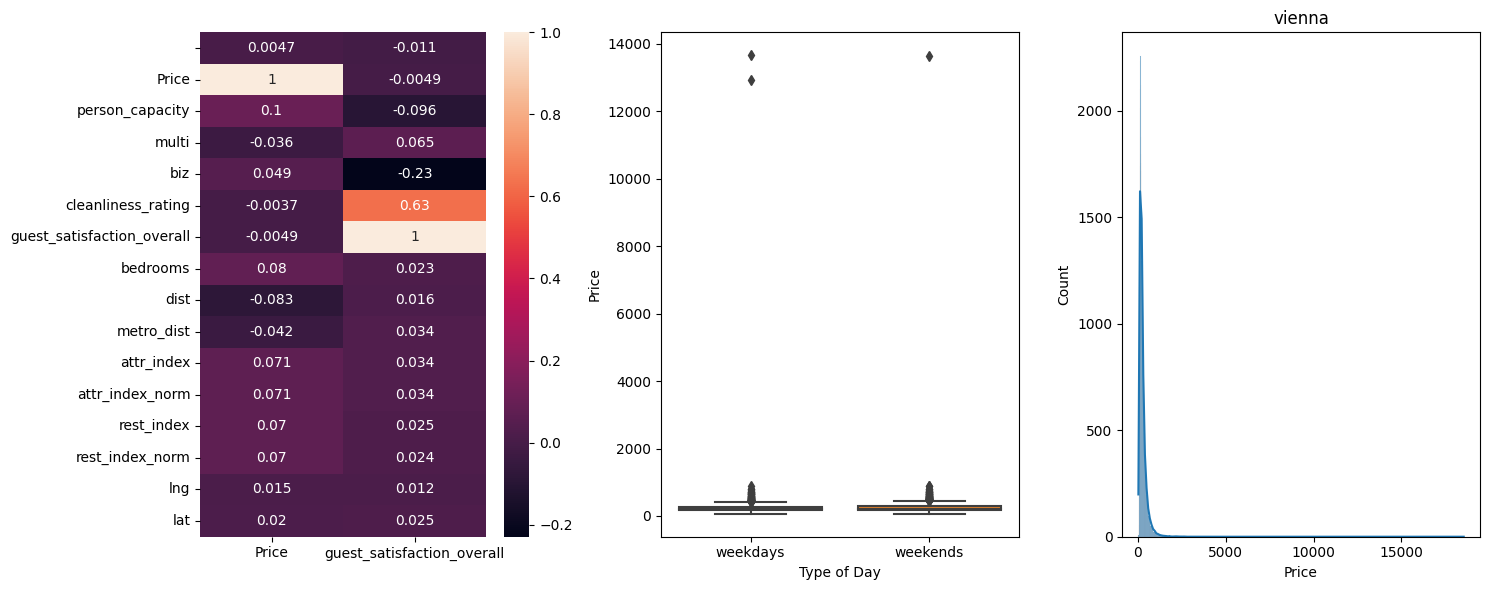

In [29]:
for i in city:
  check=data[data['City']==i]
  fig,ax=plt.subplots(1,3,figsize=(15,6))
  print(i,':',check.shape)
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);
  sns.boxplot(y='Price',x='Type of Day',data=check,ax=ax[1]);
  sns.histplot(data['Price'],kde=True)
  #plt.ylim(0,2000)
  plt.title(i)
  print(check[check['Price']>2000].shape)
  plt.tight_layout()
  plt.show();

(5280, 22)
(5231, 22)


<ipython-input-30-47589866a7d1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)


<Axes: >

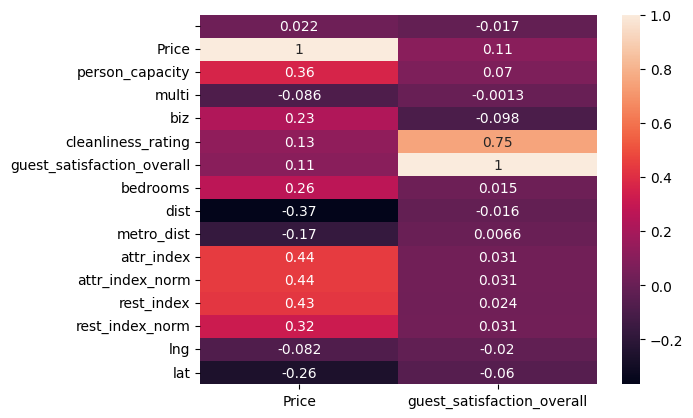

In [30]:

check=data[data['City']=='athens']
print(check.shape)
check=check[check['Price']<500]
print(check.shape)
sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)


(9993, 22)
(9698, 22)


<ipython-input-31-908f806db1e0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)


<Axes: >

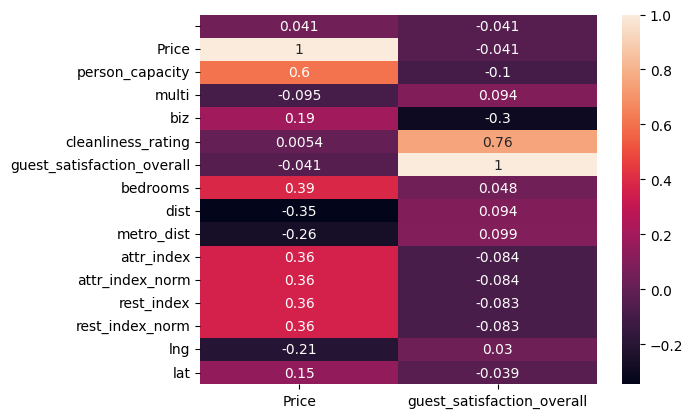

In [31]:
check=data[data['City']=='london']
print(check.shape)
check=check[check['Price']<1000]
print(check.shape)
sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)

(6688, 22)
(6636, 22)


<ipython-input-32-46cb5d68006e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)


<Axes: >

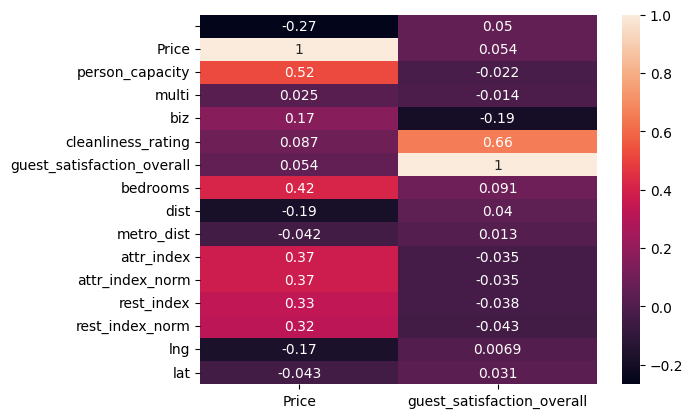

In [32]:
check=data[data['City']=='paris']
print(check.shape)
check=check[check['Price']<1500]
print(check.shape)
sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)

(9027, 22)
(8990, 22)


<ipython-input-33-d3bf3b44c176>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)


<Axes: >

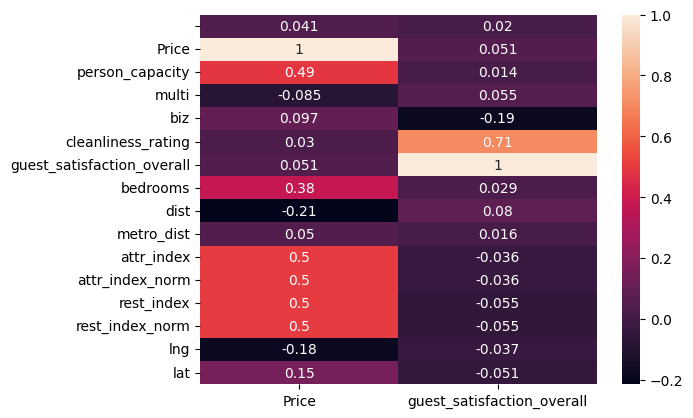

In [33]:
check=data[data['City']=='rome']
print(check.shape)
check=check[check['Price']<800]
print(check.shape)
sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)

vienna : (3537, 22)


<ipython-input-34-d0652b5596ae>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0])


(3, 22)


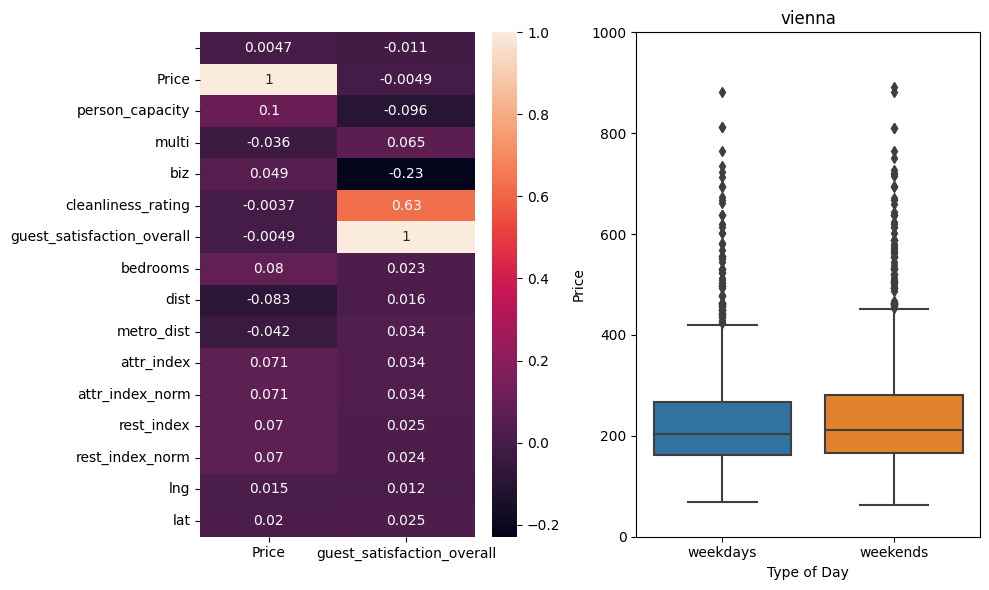

In [34]:
check=data[data['City']=='vienna']
fig,ax=plt.subplots(1,2,figsize=(10,6))
print(i,':',check.shape)
sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0])
sns.boxplot(y='Price',x='Type of Day',data=check,ax=ax[1])
plt.ylim(0,1000)
plt.title(i)
print(check[check['Price']>2000].shape)
plt.tight_layout()
plt.show();

(3537, 22)
(3491, 22)


<ipython-input-35-108c4ebf9a0d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)


<Axes: >

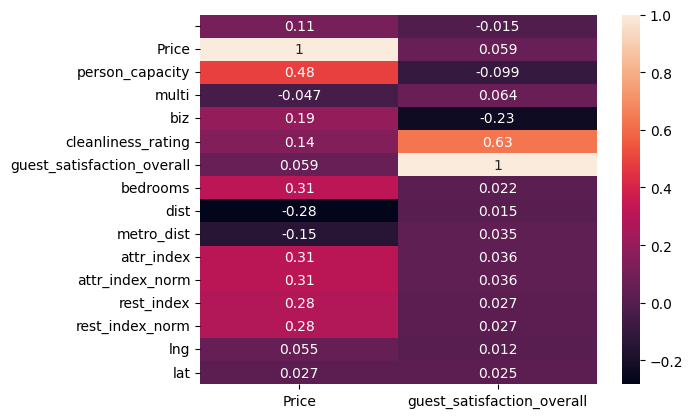

In [35]:
check=data[data['City']=='vienna']
print(check.shape)
check=check[check['Price']<600]
print(check.shape)
sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True)

In [36]:
import pandas as pd

# Assuming 'data' is your pandas DataFrame

filtered_data = data[((data['City'] == 'amsterdam') & (data['Price'] < 1500)) | ((data['City'] == 'athens') & (data['Price'] < 500)) |((data['City'] == 'barcelona') & (data['Price'] < 900))  | ((data['City'] == 'berlin') & (data['Price'] < 1000))| ((data['City'] == 'budapest') & (data['Price'] < 750))| ((data['City'] == 'lisbon') & (data['Price'] < 600))| ((data['City'] == 'london') & (data['Price'] < 1500)) | ((data['City'] == 'paris') & (data['Price'] < 1000))| ((data['City'] == 'rome') & (data['Price'] < 800))|((data['City'] == 'vienna') & (data['Price'] < 600))]

# filtered_data.head()
filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51086 entries, 0 to 51723
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0                               51086 non-null  float64
 1   City                        51086 non-null  object 
 2   Type of Day                 51086 non-null  object 
 3   Price                       51086 non-null  float64
 4   room_type                   51086 non-null  object 
 5   room_shared                 51086 non-null  object 
 6   room_private                51086 non-null  object 
 7   person_capacity             51086 non-null  float64
 8   host_is_superhost           51086 non-null  object 
 9   multi                       51086 non-null  float64
 10  biz                         51086 non-null  float64
 11  cleanliness_rating          51086 non-null  float64
 12  guest_satisfaction_overall  51086 non-null  float64
 13  bedrooms                    510

amsterdam : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


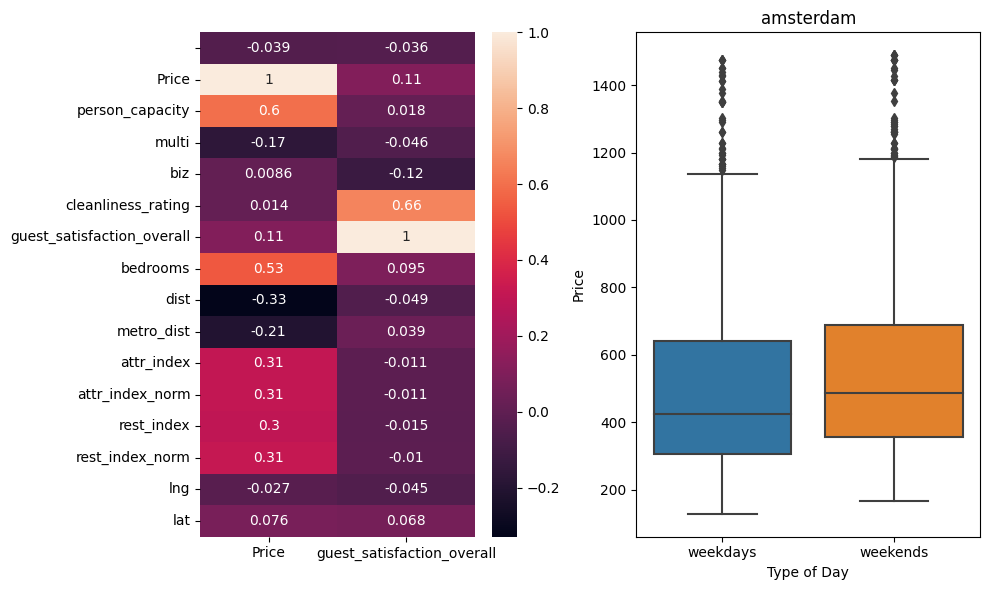

athens : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


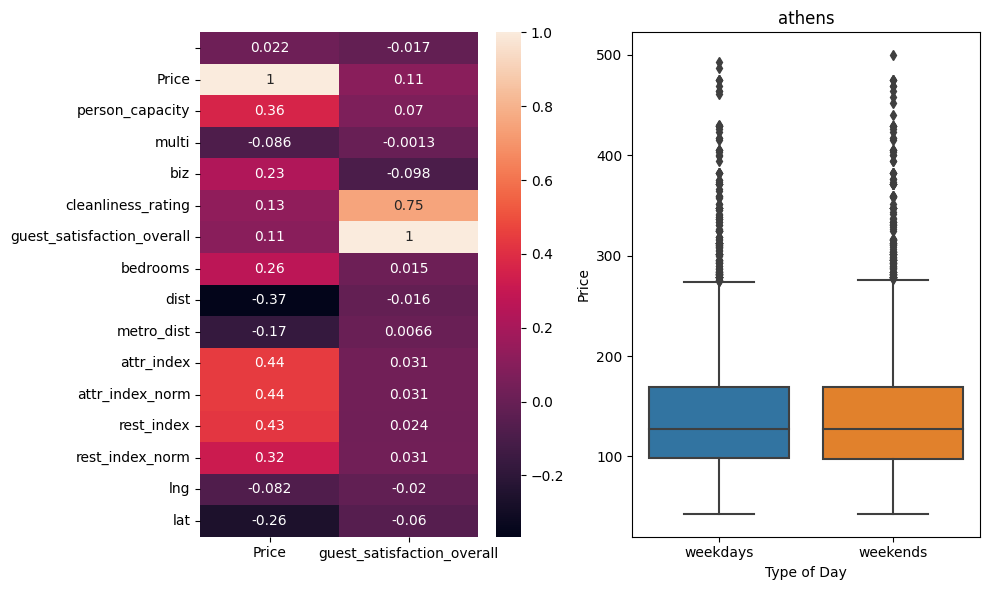

barcelona : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


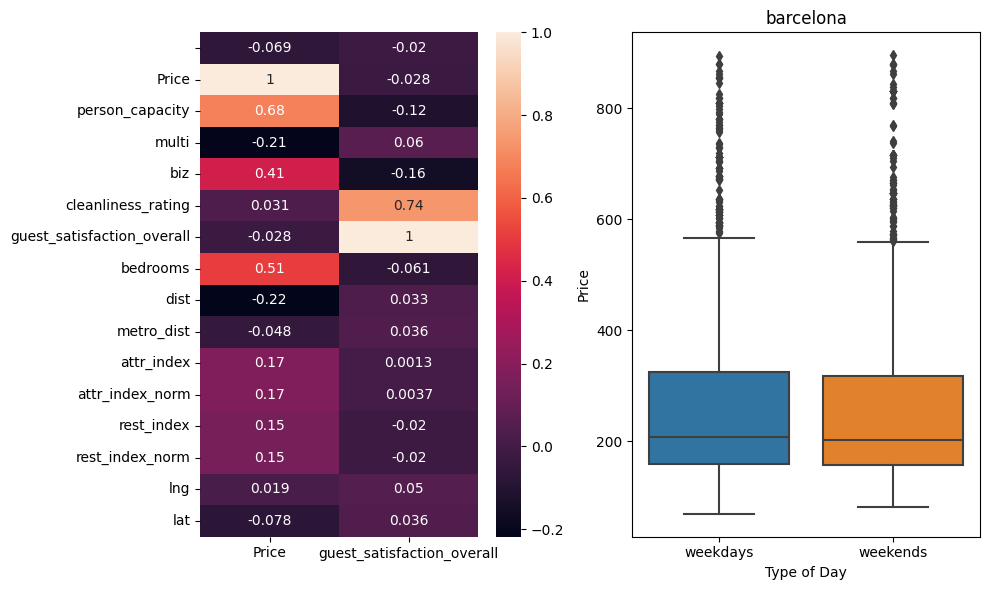

berlin : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


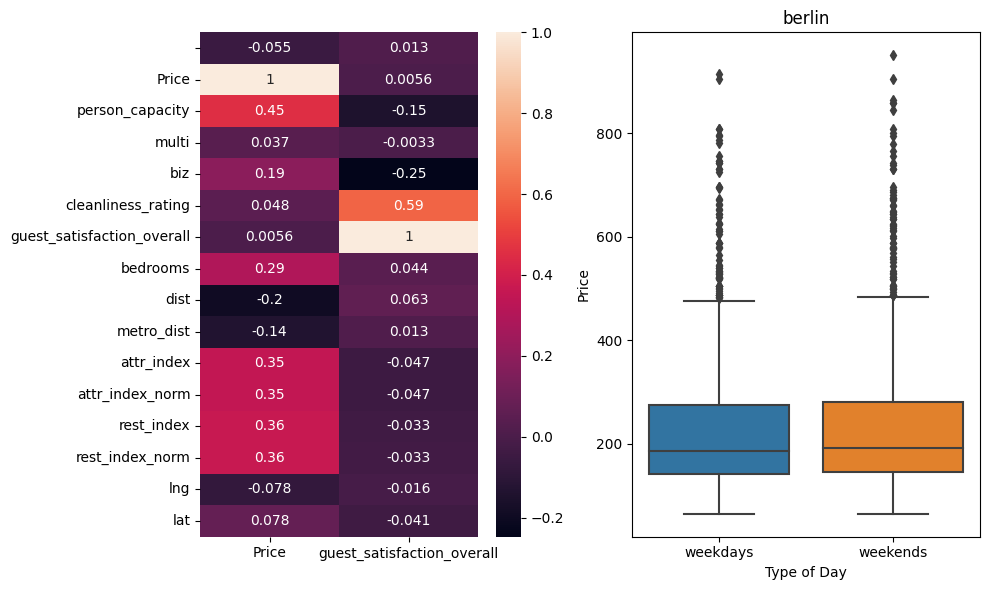

budapest : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


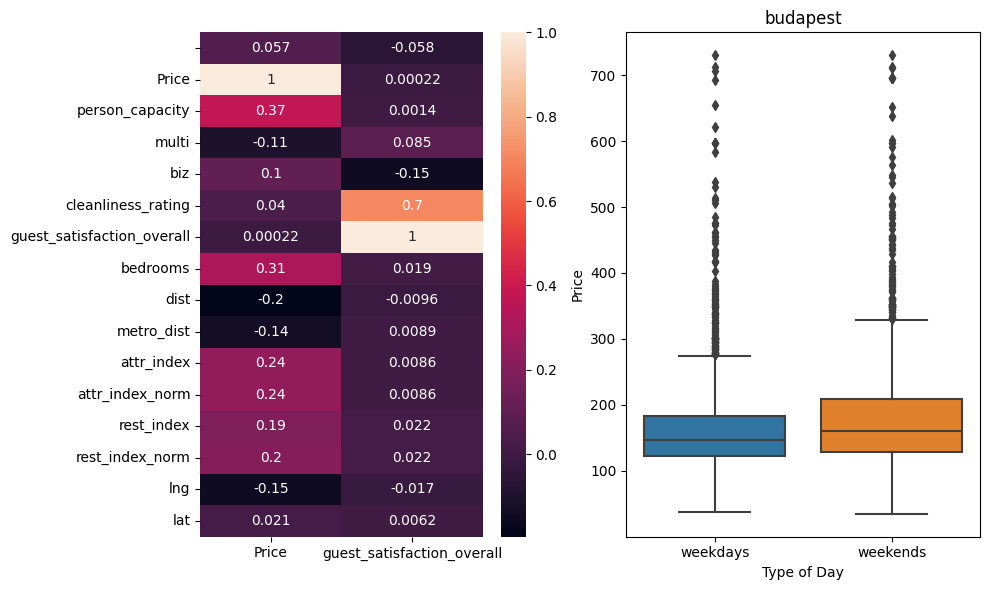

lisbon : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


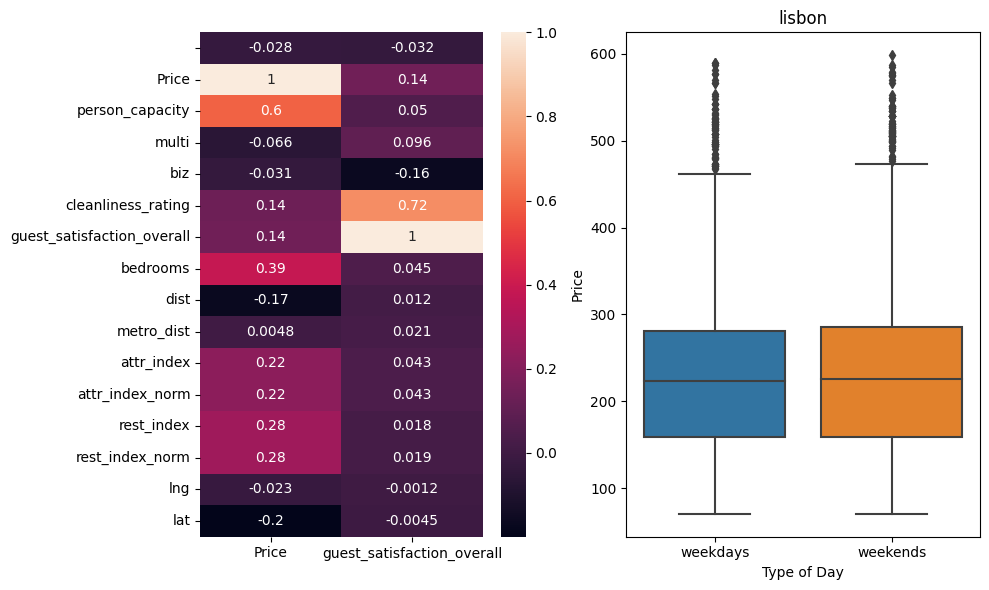

london : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


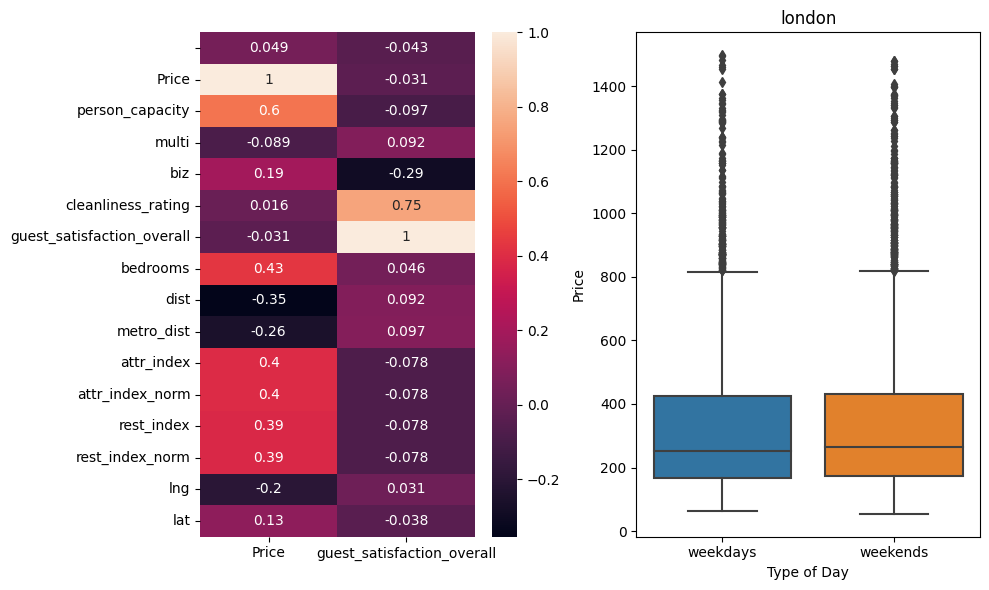

paris : (51086, 22)
(0, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


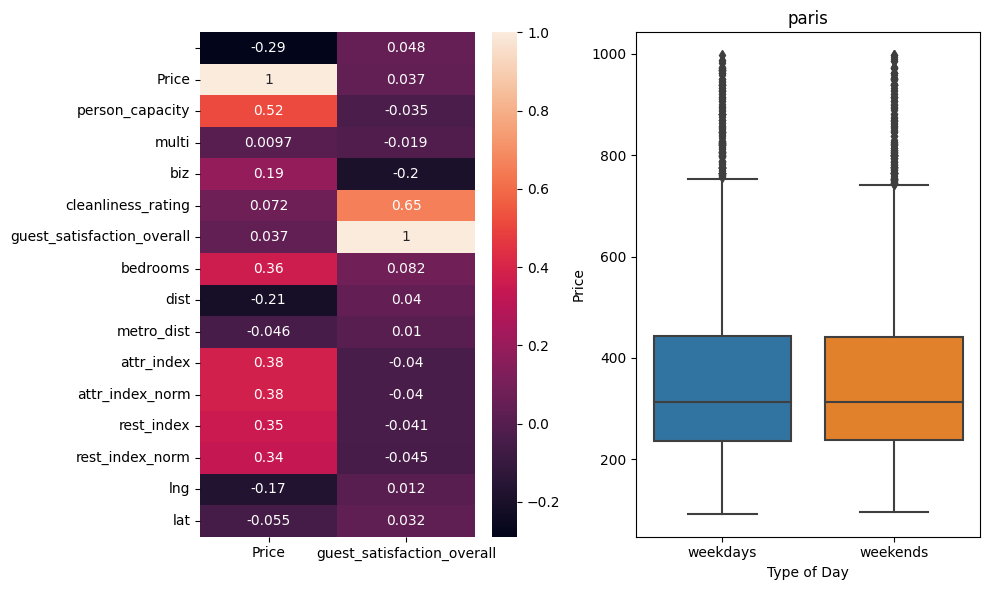

rome : (51086, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(0, 22)


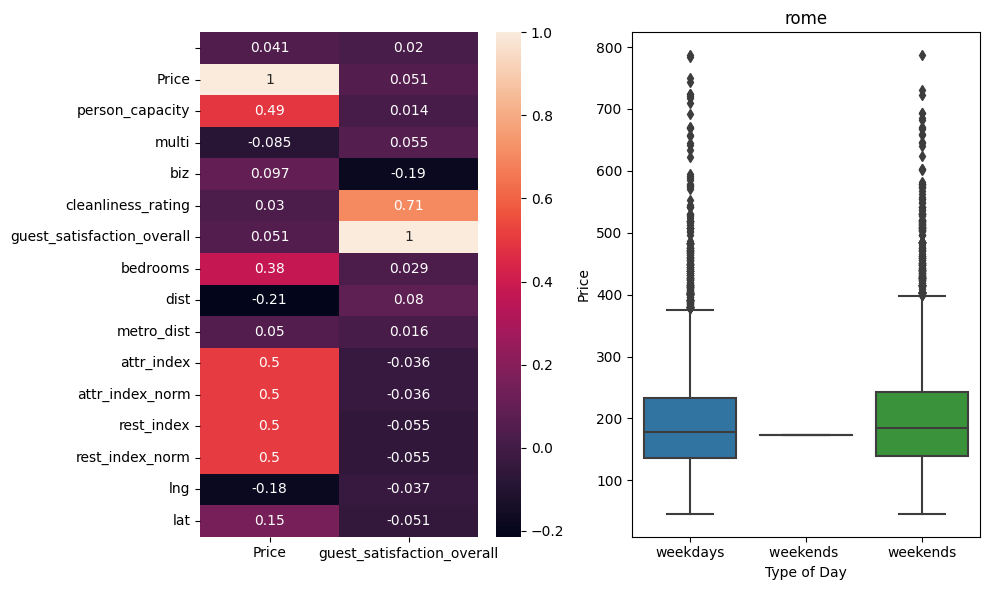

vienna : (51086, 22)


<ipython-input-37-a9d6584fec00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);


(0, 22)


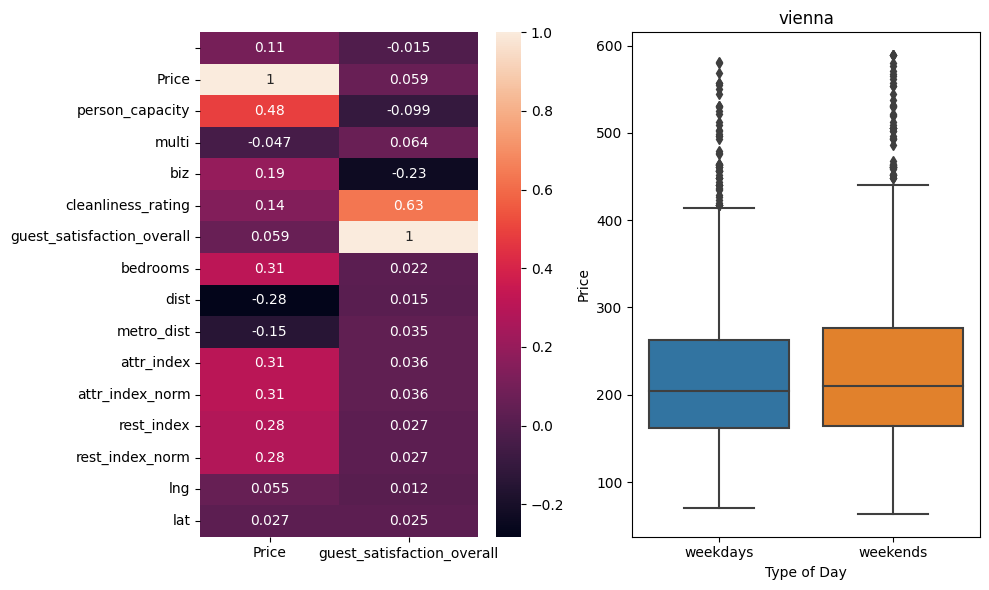

In [37]:
for i in city:
  check=filtered_data[filtered_data['City']==i]
  fig,ax=plt.subplots(1,2,figsize=(10,6))
  print(i,':',filtered_data.shape)
  sns.heatmap(check.corr()[['Price','guest_satisfaction_overall']],annot=True,ax=ax[0]);
  sns.boxplot(y='Price',x='Type of Day',data=check,ax=ax[1]);
  #plt.ylim(0,2000)
  plt.title(i)
  print(check[check['Price']>2000].shape)
  plt.tight_layout()
  plt.show();

In [42]:
data['Type of Day'].value_counts()

weekends     26206
weekdays     25500
weekends         1
Name: Type of Day, dtype: int64

In [39]:
filtered_data[filtered_data['City']=='rome'].groupby('Type of Day').agg({'Price':['mean','count']})

Price      
                   mean count
Type of Day                  
weekdays     197.299365  4474
weekends     204.654031  4515
weekends     172.770000     1

In [40]:
filtered_data=filtered_data[filtered_data.Price != 172.770000 ]

In [41]:

filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50985 entries, 0 to 51723
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0                               50985 non-null  float64
 1   City                        50985 non-null  object 
 2   Type of Day                 50985 non-null  object 
 3   Price                       50985 non-null  float64
 4   room_type                   50985 non-null  object 
 5   room_shared                 50985 non-null  object 
 6   room_private                50985 non-null  object 
 7   person_capacity             50985 non-null  float64
 8   host_is_superhost           50985 non-null  object 
 9   multi                       50985 non-null  float64
 10  biz                         50985 non-null  float64
 11  cleanliness_rating          50985 non-null  float64
 12  guest_satisfaction_overall  50985 non-null  float64
 13  bedrooms                    509

In [43]:
filtered_data.head()


,,City,Type of Day,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0.0,amsterdam,weekdays,194.03,Private room,FALSE,TRUE,2.0,FALSE,1.0,...,93.0,1.0,5.023,2.539,78.690,4.167,98.254,6.846,4.90569,52.41772
1,1.0,amsterdam,weekdays,344.25,Private room,FALSE,TRUE,4.0,FALSE,0.0,...,85.0,1.0,0.488,0.239,631.176,33.421,837.281,58.343,4.90005,52.37432
2,2.0,amsterdam,weekdays,264.10,Private room,FALSE,TRUE,2.0,FALSE,0.0,...,87.0,1.0,5.748,3.652,75.276,3.986,95.387,6.647,4.97512,52.36103
3,3.0,amsterdam,weekdays,433.53,Private room,FALSE,TRUE,4.0,FALSE,0.0,...,90.0,2.0,0.385,0.440,493.273,26.119,875.033,60.974,4.89417,52.37663
4,4.0,amsterdam,weekdays,485.55,Private room,FALSE,TRUE,2.0,TRUE,0.0,...,98.0,1.0,0.545,0.319,552.830,29.273,815.306,56.812,4.90051,52.37508


In [44]:
filtered_data['bedrooms'].value_counts()

1.0     36111
2.0      9017
0.0      4464
3.0      1291
4.0        80
9.0        10
5.0         8
10.0        2
8.0         2
Name: bedrooms, dtype: int64

In [45]:
# categorical_features = ['room_type','person_capacity','bedrooms','week time']
r_type=list(filtered_data['room_type'].unique())
r_type


['Private room', 'Entire home/apt', 'Shared room']

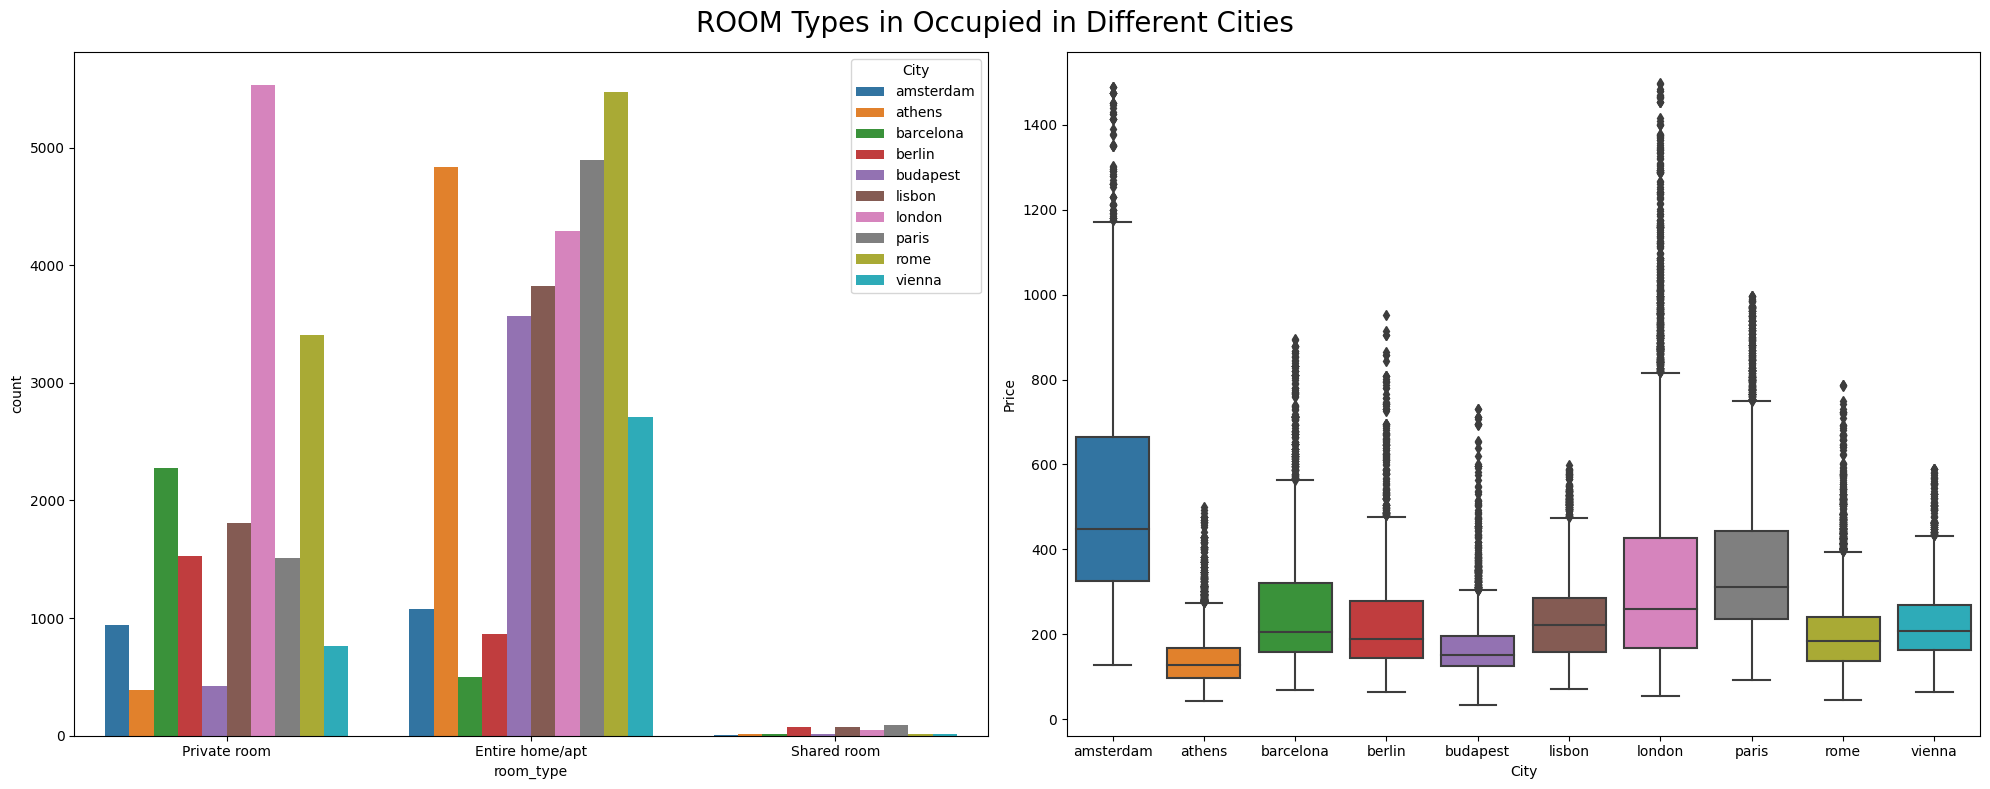

In [46]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='room_type',hue='City',data=filtered_data,ax=ax[0]);
sns.boxplot(y='Price',x='City',data=filtered_data,ax=ax[1]);
fig.suptitle("ROOM Types in Occupied in Different Cities",fontsize=20)
plt.tight_layout()
plt.show();

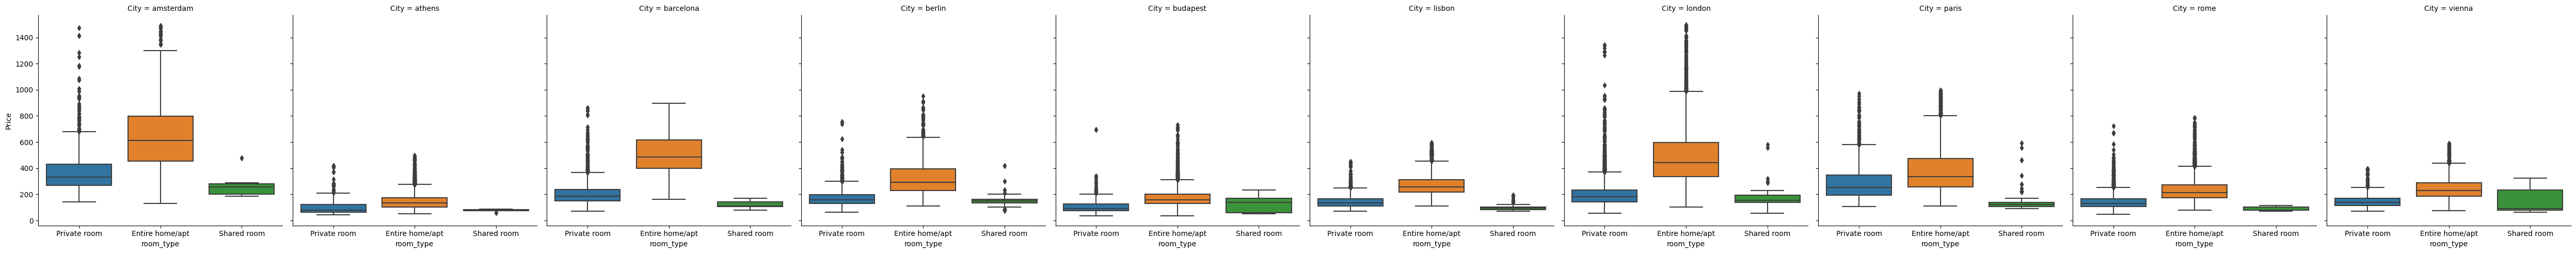

In [47]:
sns.catplot(x='room_type',y='Price',col='City',kind='box',data=filtered_data);

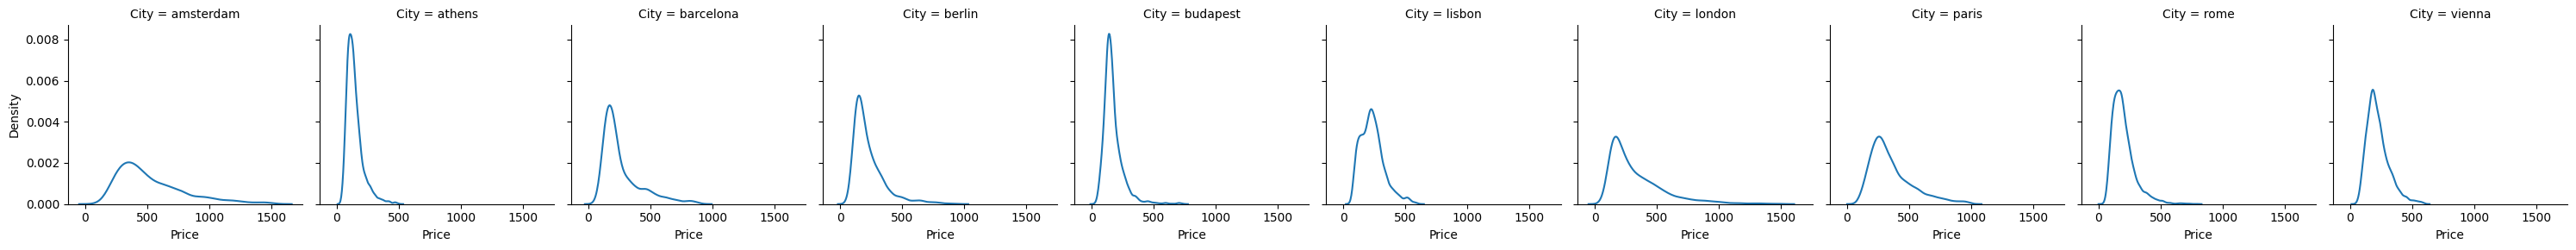

In [48]:
import seaborn as sns

# Create a FacetGrid with 'City' as the column variable
g = sns.FacetGrid(filtered_data, col='City')

# Use kdeplot to plot the distribution of 'Price' in each city
g.map(sns.kdeplot, 'Price')

# Show the plot
plt.show()


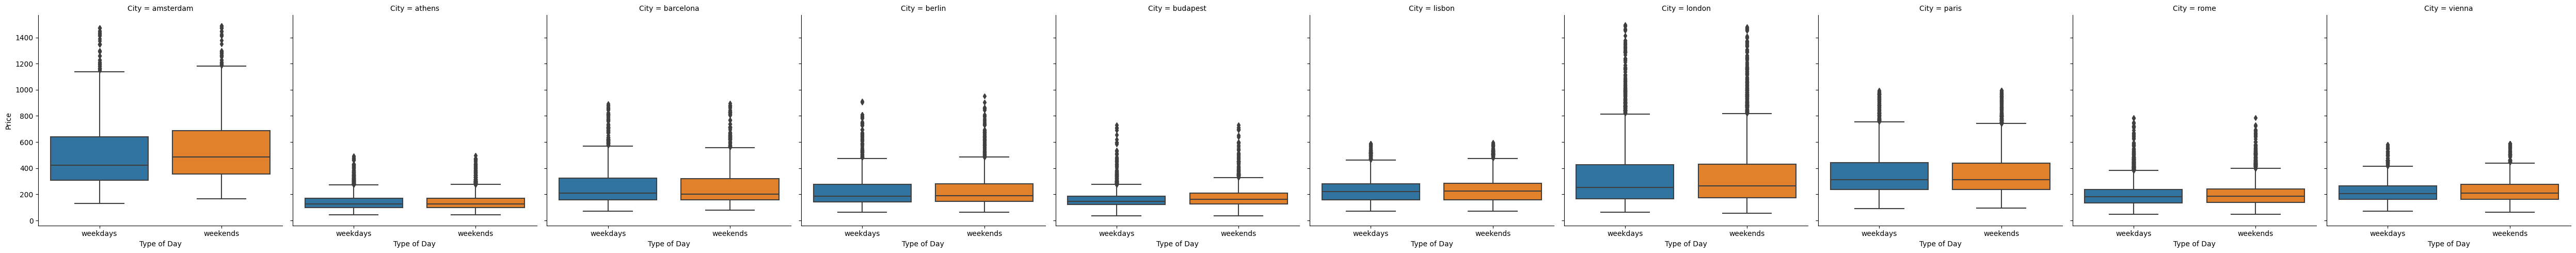

In [49]:
sns.catplot(x='Type of Day',y='Price',data=filtered_data,kind='box',col='City')

In [50]:
filtered_data['room_shared'].value_counts()

FALSE    50619
TRUE       366
Name: room_shared, dtype: int64

In [51]:
filtered_data['room_private'].value_counts()

FALSE    32410
TRUE     18575
Name: room_private, dtype: int64

(0.0, 1500.0)

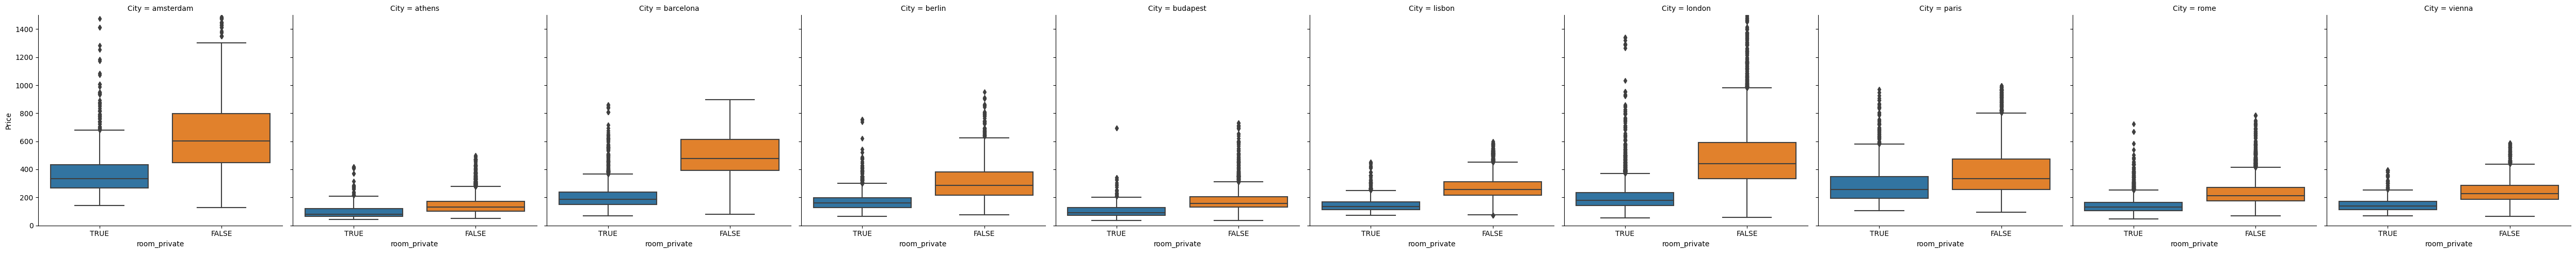

In [52]:
sns.catplot(x='room_private',y='Price',col='City',kind='box',data=filtered_data)
plt.ylim(0,1500)

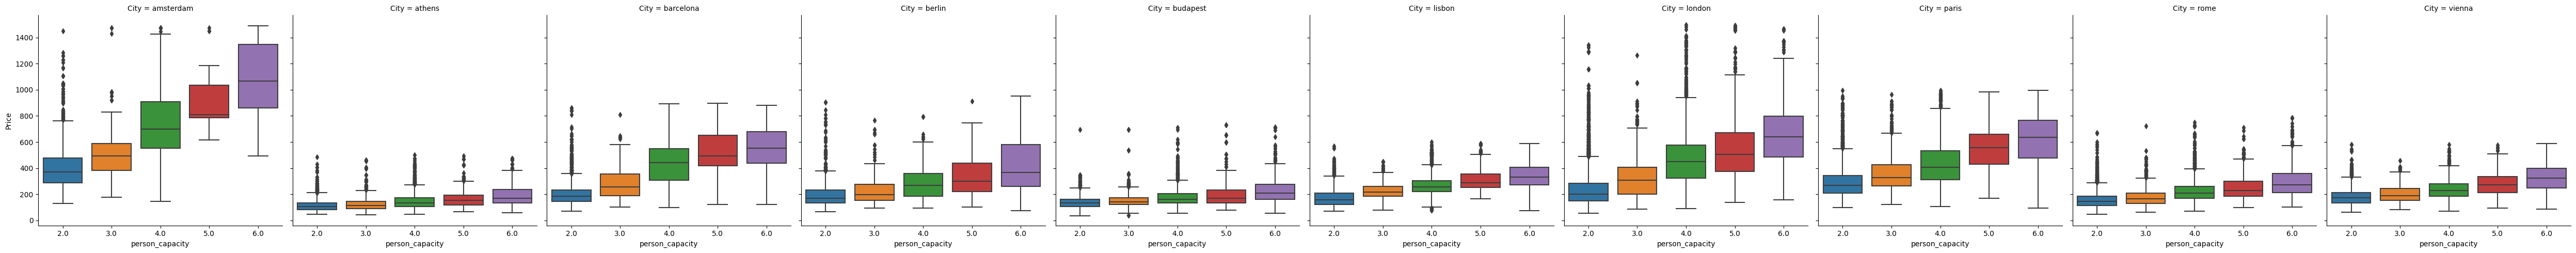

In [53]:
sns.catplot(x='person_capacity',y='Price',col='City',kind='box',data=filtered_data)

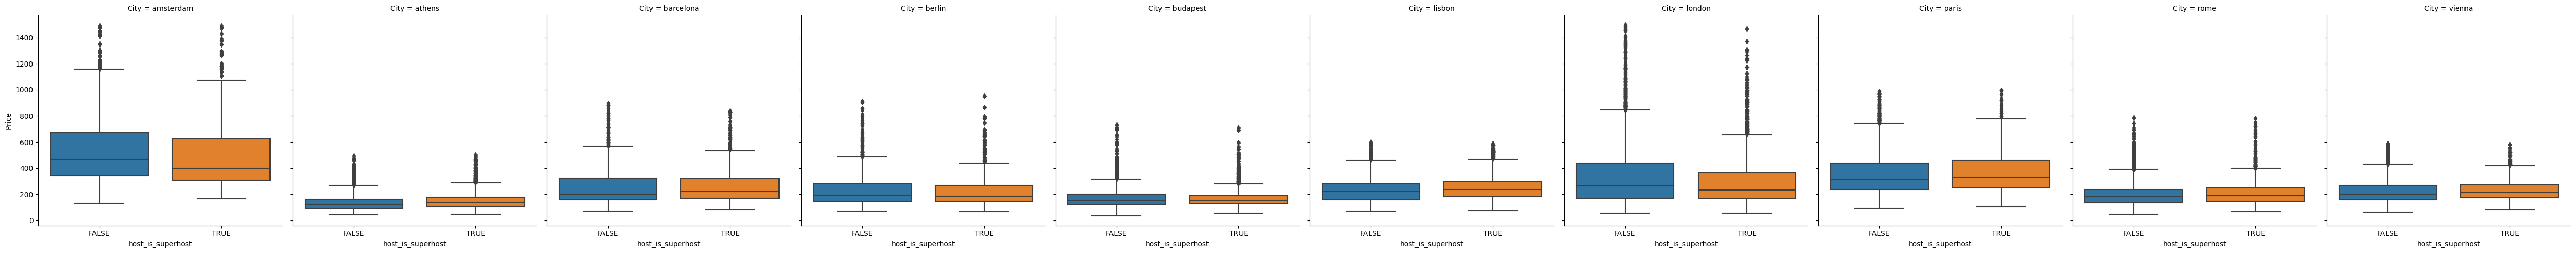

In [54]:
sns.catplot(x='host_is_superhost',y='Price',col='City',kind='box',data=filtered_data)

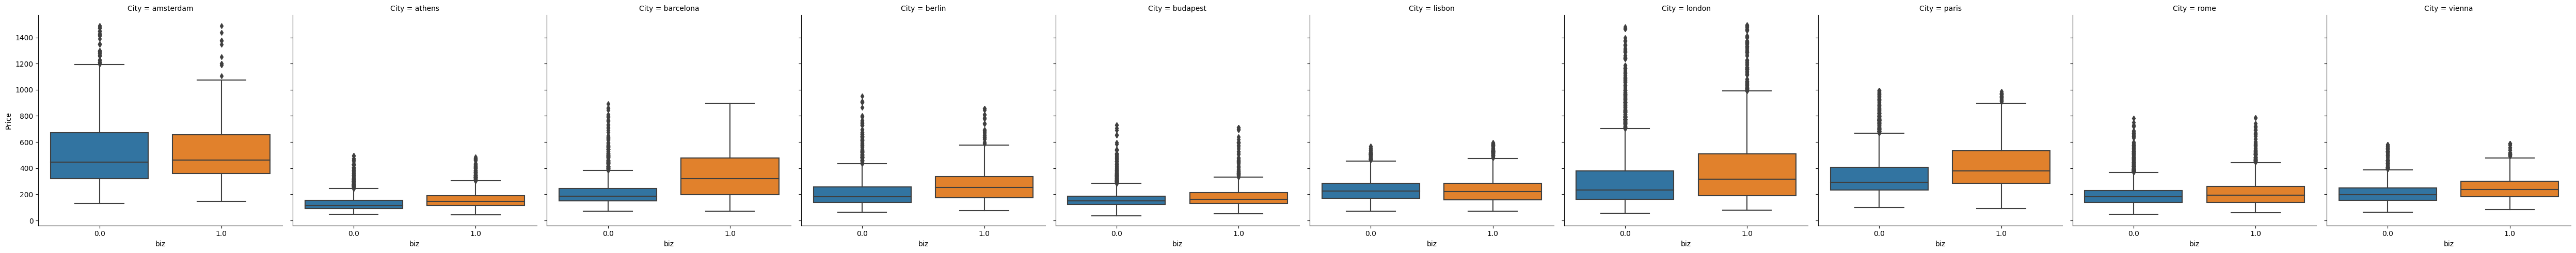

In [55]:
sns.catplot(x='biz',y='Price',col='City',kind='box',data=filtered_data)

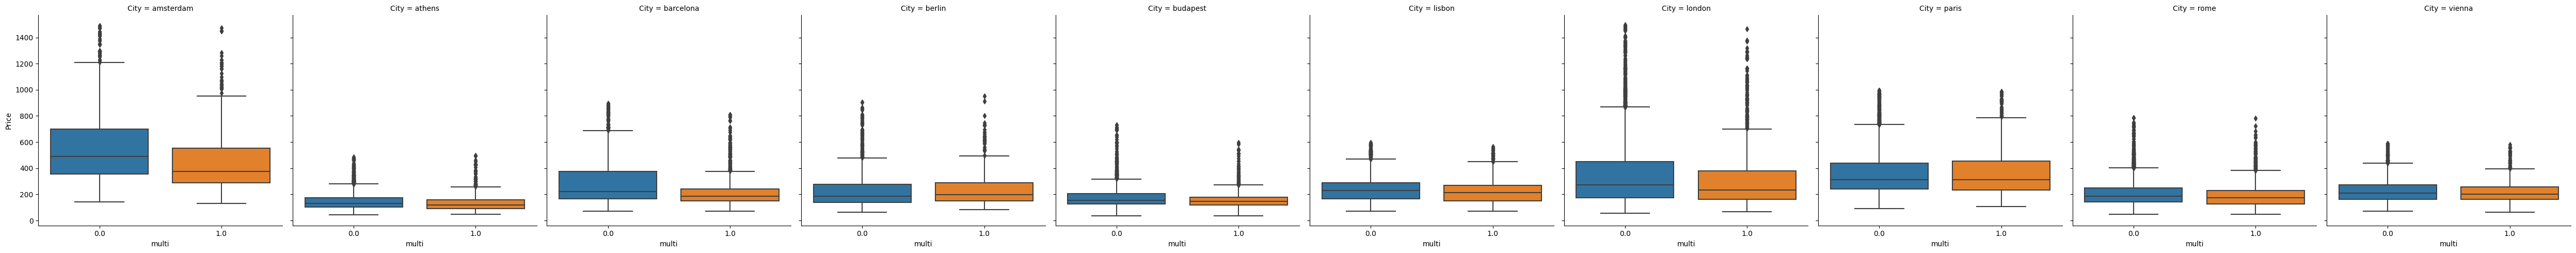

In [56]:
sns.catplot(x='multi',y='Price',col='City',kind='box',data=filtered_data)

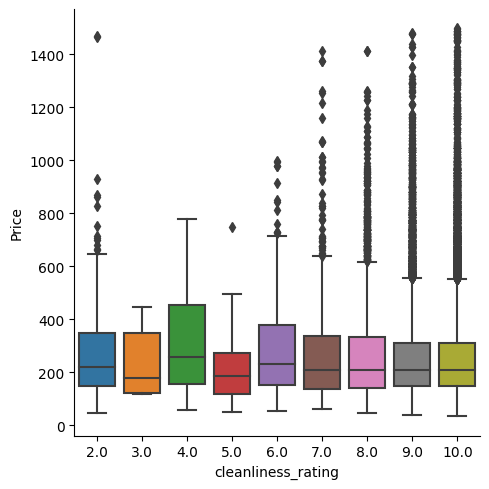

In [57]:
sns.catplot(x='cleanliness_rating',y='Price',kind='box',data=filtered_data)

In [59]:
filtered_data['bedrooms'].value_counts()

1.0     36111
2.0      9017
0.0      4464
3.0      1291
4.0        80
9.0        10
5.0         8
10.0        2
8.0         2
Name: bedrooms, dtype: int64

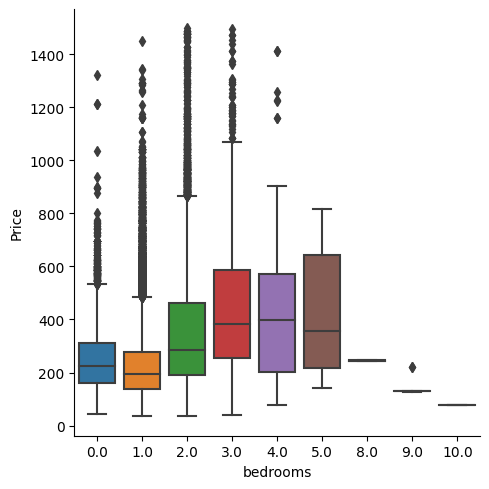

In [58]:
sns.catplot(x='bedrooms',y='Price',kind='box',data=filtered_data)

In [60]:
filtered_data.drop(['room_shared','host_is_superhost'],axis=1,inplace=True)

In [61]:
filtered_data.room_private.value_counts()

FALSE    32410
TRUE     18575
Name: room_private, dtype: int64

In [62]:
def label_encoding(x):
  if x=='TRUE':
    return 1
  else:
    return 0
filtered_data['room_private']=filtered_data['room_private'].apply(lambda x:label_encoding(x))

In [63]:
filtered_data.head()

,,City,Type of Day,Price,room_type,room_private,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0.0,amsterdam,weekdays,194.03,Private room,1,2.0,1.0,0.0,10.0,93.0,1.0,5.023,2.539,78.690,4.167,98.254,6.846,4.90569,52.41772
1,1.0,amsterdam,weekdays,344.25,Private room,1,4.0,0.0,0.0,8.0,85.0,1.0,0.488,0.239,631.176,33.421,837.281,58.343,4.90005,52.37432
2,2.0,amsterdam,weekdays,264.10,Private room,1,2.0,0.0,1.0,9.0,87.0,1.0,5.748,3.652,75.276,3.986,95.387,6.647,4.97512,52.36103
3,3.0,amsterdam,weekdays,433.53,Private room,1,4.0,0.0,1.0,9.0,90.0,2.0,0.385,0.440,493.273,26.119,875.033,60.974,4.89417,52.37663
4,4.0,amsterdam,weekdays,485.55,Private room,1,2.0,0.0,0.0,10.0,98.0,1.0,0.545,0.319,552.830,29.273,815.306,56.812,4.90051,52.37508


In [64]:
from sklearn.model_selection import train_test_split


In [65]:
filtered_data.head()

,,City,Type of Day,Price,room_type,room_private,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0.0,amsterdam,weekdays,194.03,Private room,1,2.0,1.0,0.0,10.0,93.0,1.0,5.023,2.539,78.690,4.167,98.254,6.846,4.90569,52.41772
1,1.0,amsterdam,weekdays,344.25,Private room,1,4.0,0.0,0.0,8.0,85.0,1.0,0.488,0.239,631.176,33.421,837.281,58.343,4.90005,52.37432
2,2.0,amsterdam,weekdays,264.10,Private room,1,2.0,0.0,1.0,9.0,87.0,1.0,5.748,3.652,75.276,3.986,95.387,6.647,4.97512,52.36103
3,3.0,amsterdam,weekdays,433.53,Private room,1,4.0,0.0,1.0,9.0,90.0,2.0,0.385,0.440,493.273,26.119,875.033,60.974,4.89417,52.37663
4,4.0,amsterdam,weekdays,485.55,Private room,1,2.0,0.0,0.0,10.0,98.0,1.0,0.545,0.319,552.830,29.273,815.306,56.812,4.90051,52.37508


In [66]:
x=filtered_data.drop('Price',axis=1)
y=filtered_data['Price']

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40788, 19)
(10197, 19)
(40788,)
(10197,)


In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose  import ColumnTransformer
transformer=ColumnTransformer(transformers=[
    ('enc',OneHotEncoder(sparse=False),['City','Type of Day','room_type'])
    ]
     ,remainder="passthrough")
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('enc', OneHotEncoder(sparse=False),
                                 ['City', 'Type of Day', 'room_type'])])

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
pipeline=Pipeline([
    ('preprocessing',transformer),
    ('regressor',RandomForestRegressor(verbose=True))
])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(sparse=False),
                                                  ['City', 'Type of Day',
                                                   'room_type'])])),
                ('regressor', RandomForestRegressor(verbose=True))])

In [72]:
pipeline.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   26.2s


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(sparse=False),
                                                  ['City', 'Type of Day',
                                                   'room_type'])])),
                ('regressor', RandomForestRegressor(verbose=True))])

In [82]:
pipeline.score(x_test,y_test)*100

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


84.28899961690506

In [75]:
from sklearn.metrics import mean_squared_error as mse

In [84]:
test_pred=pipeline.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [87]:
MSE=mse(test_pred,y_test)
RMSE=np.sqrt(MSE)

In [88]:
print(f"MSE: {MSE},' ',RMSE: {RMSE}")

MSE: 4948.935819137841,' ',RMSE: 70.34867318676196


In [89]:
import joblib
file_name='AirBNB Price Prediction Model.pkl'
joblib.dump(pipeline,file_name)

['AirBNB Price Prediction Model.pkl']